GloVe - Global Vectors for Word Representation - é um modelo de vetorização de palavras desenvolvido com o intuito de identificar as relações sintáticas e semânticas entre as palavras em um conjunto de um texto. 

* Características: o GloVe utiliza estatísticas de co-ocorrência global de palavras para aprender representações vetoriais.

* Seu processo de treinamento envolve a construção de uma matriz que registra a frequência da ocorrência das palavras. 

* Intuição: palavras que compartilham uma frequência próxima, possuem e um significado semelhante. 

* Utilização da 'função de perda' (loss function) utilizada com o intuito de maximizar a probabilidade de co-ocorrência de pares de palavras.

# Setup e Instalação


In [66]:
## Importação das bibliotecas necessárias
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.models import KeyedVectors
import pandas as pd



In [67]:
##arquivo csv dos dados já lematizados
df_lemma = pd.read_csv('/content/drive/MyDrive/Módulo 2/Programação/ Dados/lematizacao.csv')
df_lemma

,Unnamed: 0,autor,texto,sentimento,tokens
0,0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,"['confira', 'o', 'resultado', 'de o', 'nosso',..."
1,1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp..."
2,2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,"['repost', 'btg', 'With', 'makerepost', 'enten..."
3,3,lmviapiana,Minuto touro de ouro,POSITIVE,"['minuto', 'touro', 'ouro']"
4,4,vanilson_dos,@ricktolledo Sim,NEUTRAL,"['Ricktolledo', 'sim']"
...,...,...,...,...,...
12188,12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,"['um', 'noite', 'encontro', 'muito', 'conhecim..."
12189,12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,"['erro', 'financeiro', 'eliminar', 'antes', 'd..."
12190,12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,"['estar', 'muito', 'grato', 'todo', 'esforco',..."
12191,12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,['dorsodamaocomdedoindicadorapontandoparaadire...


# Preparação e aplicação do Modelo

## Testes isolados - vetores GloVe 

In [68]:
import spacy

# Carregamento do modelo com a utilização de vetores GloVe
nlp = spacy.load('en_core_web_sm')

# Vetor da palavra teste (amor)
word_vector = nlp('amor')[0].vector
print("Vetor de 'amor':", word_vector)


Vetor de 'amor': [-0.7675346  -1.2914119  -1.2610053   0.43638706  0.41730928 -0.67410934
 -0.00713053  1.039751   -0.60677785 -0.37683797  1.1499811  -1.0154366
  0.03720399  0.5561315   0.15345535 -0.38315913 -0.9826127  -0.7544666
  0.3152586  -0.5631548  -1.9183025   0.29983723 -0.6364049  -0.01712024
  1.1100935   0.71326786  0.13572139  1.8997638  -0.78863984  0.45132664
 -0.6335362  -0.10398477  0.5744598   0.1946993   0.34879196 -1.7102339
  1.3521185   0.3432263   0.6610534   1.0336604  -0.6339377   1.0569483
 -0.35751405  0.402013   -0.38236997  0.54524916 -0.97520125  0.6011804
  0.6074149   0.1020565   0.69450414  0.15316898  0.02533296  1.3945224
  0.68237376 -0.3726989   1.345404   -1.2171242   0.349316   -0.03657996
 -1.2198852  -1.3399961  -0.33141914  0.24455091  1.6623571   0.22606379
  2.0024016  -0.1863009   1.2482862  -1.2757518   0.16964805  0.6132533
 -0.47198552  0.53036666 -1.2426664   0.2717209   1.4021567  -0.41733184
  0.4343045  -1.4335086  -0.40973434 -0.3

In [69]:
##leitura dos dados
modelo_glove = pd.read_csv('/content/drive/MyDrive/Módulo 2/Programação/ Dados/lematizacao.csv')
modelo_glove

,Unnamed: 0,autor,texto,sentimento,tokens
0,0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,"['confira', 'o', 'resultado', 'de o', 'nosso',..."
1,1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp..."
2,2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,"['repost', 'btg', 'With', 'makerepost', 'enten..."
3,3,lmviapiana,Minuto touro de ouro,POSITIVE,"['minuto', 'touro', 'ouro']"
4,4,vanilson_dos,@ricktolledo Sim,NEUTRAL,"['Ricktolledo', 'sim']"
...,...,...,...,...,...
12188,12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,"['um', 'noite', 'encontro', 'muito', 'conhecim..."
12189,12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,"['erro', 'financeiro', 'eliminar', 'antes', 'd..."
12190,12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,"['estar', 'muito', 'grato', 'todo', 'esforco',..."
12191,12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,['dorsodamaocomdedoindicadorapontandoparaadire...


# Algoritmo: Regressão Logística

In [70]:
##importação de bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.models import KeyedVectors

#leitura
df_lemma = pd.read_csv('/content/drive/MyDrive/Módulo 2/Programação/ Dados/lematizacao.csv')

##identificação dos valores de X e Y
X = df_lemma['texto']
y = df_lemma['sentimento']

## CountVectorizer e Tfid
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

##Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Acurácia:", accuracy)


Acurácia: 0.7519475194751948


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.metrics import classification_report

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Cálculo das métricas
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

    NEGATIVE       0.77      0.54      0.64       479
     NEUTRAL       0.71      0.85      0.77      1047
    POSITIVE       0.81      0.75      0.78       913

    accuracy                           0.75      2439
   macro avg       0.76      0.71      0.73      2439
weighted avg       0.76      0.75      0.75      2439



In [72]:
##arquivo csv
df = pd.read_csv('/content/drive/MyDrive/Módulo 2/Programação/ Dados/lematizacao.csv')
df

,Unnamed: 0,autor,texto,sentimento,tokens
0,0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,"['confira', 'o', 'resultado', 'de o', 'nosso',..."
1,1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp..."
2,2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,"['repost', 'btg', 'With', 'makerepost', 'enten..."
3,3,lmviapiana,Minuto touro de ouro,POSITIVE,"['minuto', 'touro', 'ouro']"
4,4,vanilson_dos,@ricktolledo Sim,NEUTRAL,"['Ricktolledo', 'sim']"
...,...,...,...,...,...
12188,12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,"['um', 'noite', 'encontro', 'muito', 'conhecim..."
12189,12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,"['erro', 'financeiro', 'eliminar', 'antes', 'd..."
12190,12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,"['estar', 'muito', 'grato', 'todo', 'esforco',..."
12191,12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,['dorsodamaocomdedoindicadorapontandoparaadire...


In [73]:
##arquivo do conjunto de dados pré-treinados do modelo GloVe
import gensim.downloader
glove_model = gensim.downloader.load('glove-twitter-25')


In [74]:
# Lista de armazenamrnto de vetores
token_vectors = []

# Iteração de tokens
for tokens in df['tokens']:
    document_vectors = []
    for token in tokens:
        if token in glove_model:
          
            # Obter o vetor do token no modelo GloVe
            vector = glove_model[token]
            document_vectors.append(vector)
        else:
            # Caso o token não esteja presente no modelo, pode-se utilizar um vetor de zeros ou algum valor padrão
            document_vectors.append(np.zeros_like(glove_model.vector_size))
    
    # Calcular a média dos vetores dos tokens da entrada atual
    document_vector = np.mean(document_vectors, axis=0)
    
    # Adicionar o vetor resultante à lista
    token_vectors.append(document_vector)

# Converter a lista de vetores em um array numpy
token_vectors = np.array(token_vectors)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


# Algoritmo: Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB ##Naive Bayes
from sklearn.metrics import accuracy_score


In [76]:
##mapeamento das colunas em valores numéricos (Positivo = 3; Neutro = 1, e Negativo=2)
sentimento_mapping = {'POSITIVE': 3, 'NEUTRAL': 1, 'NEGATIVE': 2}
y_mapped = df['sentimento'].map(sentimento_mapping)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(token_vectors, y_mapped, test_size=0.2, random_state=42)


In [78]:
##treinamento do algoritmo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predição e cálculo da acurácia
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Acurácia: 0.4948749487494875


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Treinamento do modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predição e cálculo da acurácia
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.5744157441574416


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Gráficos e Análises

## Aplicação de funções

In [80]:


# Calcular recall
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

In [81]:
##Printar um relatório de classificação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, f1_score, recall_score
print("Acurácia:", accuracy)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))
print("Recall (micro):", recall_micro)
print("Recall (macro):", recall_macro)
print("Recall (weighted):", recall_weighted)


Acurácia: 0.5744157441574416
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.65      0.63      0.64      1047
           2       0.53      0.28      0.36       479
           3       0.52      0.67      0.59       913

    accuracy                           0.57      2439
   macro avg       0.56      0.52      0.53      2439
weighted avg       0.58      0.57      0.56      2439

Recall (micro): 0.5744157441574416
Recall (macro): 0.5247503740792446
Recall (weighted): 0.5744157441574416


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

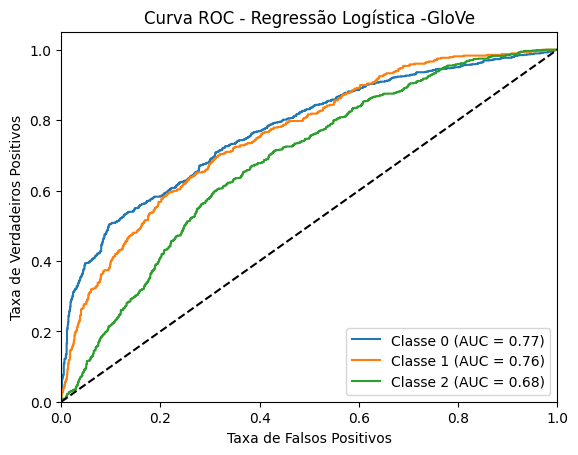

In [82]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar os rótulos
y_bin = label_binarize(y_mapped, classes=np.unique(y_mapped))

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(token_vectors, y_bin, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão logística
model_lr = LogisticRegression()

# Lista para armazenar as curvas ROC de cada classe
roc_curves = []

# Treinar um classificador para cada classe
for i in range(y_train.shape[1]):
    # Treinar o modelo de regressão logística para a classe i
    model_lr.fit(X_train, y_train[:, i])
    
    # Obter as probabilidades previstas para a classe i
    y_scores = model_lr.predict_proba(X_test)[:, 1]
    
    # Calcular a curva ROC para a classe i
    fpr, tpr, _ = roc_curve(y_test[:, i], y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Armazenar a curva ROC da classe i
    roc_curves.append((fpr, tpr, roc_auc))

# Plotar as curvas ROC de cada classe
plt.figure()

for i, curve in enumerate(roc_curves):
    fpr, tpr, roc_auc = curve
    plt.plot(fpr, tpr, label='Classe {0} (AUC = {1:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística -GloVe')
plt.legend(loc="lower right")
plt.show()

##Observações: Classe 0(neutro), Classe 1(negativo), Classe 2(positivo)

# Definição de funções 

In [93]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
import numpy as np

# Carregar o arquivo com os dados de treinamento
df_lemma = pd.read_csv('/content/drive/MyDrive/Módulo 2/Programação/ Dados/lematizacao.csv')

# Preparar os dados de treinamento
X_train = df_lemma['texto']
y_train = df_lemma['sentimento']

# Vetorização dos dados com CountVectorizer e TfidfTransformer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Treinamento do modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Função para avaliar o sentimento de um novo comentário
def avaliar_sentimento(comentario):
    # Vetorizar o novo comentário
    X_new_counts = vectorizer.transform([comentario])
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)

    # Realizar a previsão do sentimento do comentário
    resultado = model.predict(X_new_tfidf)
    return resultado[0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Testes Isolados

In [94]:

# Exemplo de uso da função
novo_comentario =  "serviço ok"
sentimento = avaliar_sentimento(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: NEUTRAL


In [95]:

# Exemplo de uso da função
novo_comentario = "banco golpista ladrão"
sentimento = avaliar_sentimento(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: NEGATIVE


In [96]:

# Exemplo de uso da função
novo_comentario = "amo demais o btg!"
sentimento = avaliar_sentimento(novo_comentario)
print("Sentimento:", sentimento)

Sentimento: POSITIVE
